In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

Download the dataset in csv format. (https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality)

Load the dataset into a variable **apple_quality**


In [2]:
apple=np.genfromtxt("Data/apple_quality.csv", delimiter=",", dtype=np.float32, usemask=True, skip_header=1)


X = apple.data[:-1, :-1]

apple=np.genfromtxt("Data/apple_quality.csv", delimiter=",", dtype=str, usemask=True, skip_header=1)
y = apple[:-1, 8]


print(X)
print(y)

[[ 0.0000000e+00 -3.9700484e+00 -2.5123365e+00 ...  1.8449004e+00
   3.2983980e-01 -4.9159047e-01]
 [ 1.0000000e+00 -1.1952171e+00 -2.8392565e+00 ...  8.5328579e-01
   8.6753011e-01 -7.2280937e-01]
 [ 2.0000000e+00 -2.9202387e-01 -1.3512820e+00 ...  2.8386354e+00
  -3.8033329e-02  2.6216364e+00]
 ...
 [ 3.9970000e+03 -2.6345153e+00 -2.1382468e+00 ...  2.1997087e+00
   4.7638593e+00 -1.3346114e+00]
 [ 3.9980000e+03 -4.0080037e+00 -1.7793370e+00 ...  2.1614351e+00
   2.1448839e-01 -2.2297199e+00]
 [ 3.9990000e+03  2.7853966e-01 -1.7155050e+00 ...  1.2666774e+00
  -7.7657145e-01  1.5997964e+00]]
['good' 'good' 'bad' ... 'bad' 'good' 'good']


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# entrenament
classifier= LogisticRegression().fit(X_train, y_train)

/home/iticbcn/Escritorio/CE/IA/Virtualsenv/sklearn-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
## use a random forest classifier to identify the wines
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


## Get the accuracy of your model
RFC = RandomForestClassifier()

RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)


0.8825


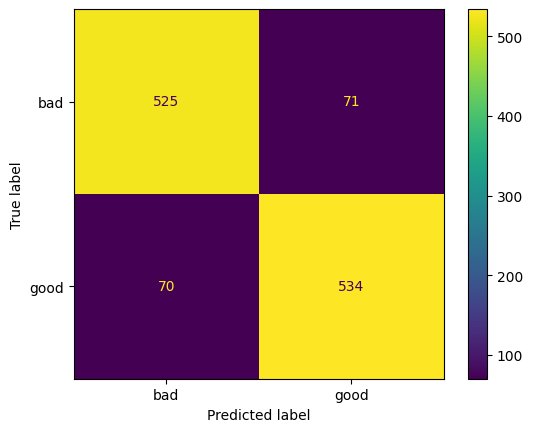

In [5]:
## Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(RFC, X_test, y_test)

In [6]:
## Use Select KBest to select N amount of features.
## test this features using the same classifier you used
from sklearn.feature_selection import SelectKBest

dim_selector = SelectKBest(k=4)

dim_selector.fit(X_train,y_train)
X_train_lessdim = dim_selector.transform(X_train)
X_test_lessdim = dim_selector.transform(X_test)

#fit_transform(X, y)

In [7]:
# Entrenamiento del modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_lessdim, y_train)

# Predicción en el conjunto de prueba
y_pred = clf.predict(X_test_lessdim)
acc = accuracy_score(y_pred, y_test)
print(acc)



0.8233333333333334


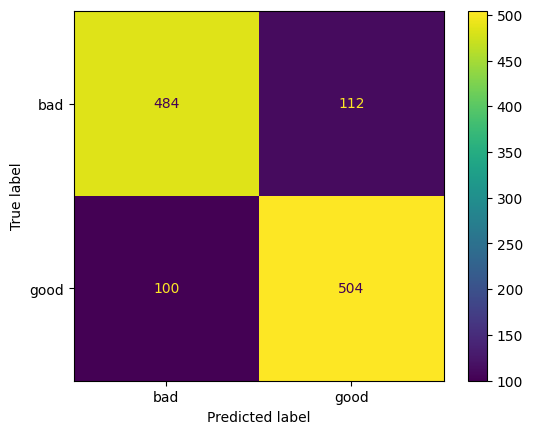

In [8]:
## Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test_lessdim, y_test)

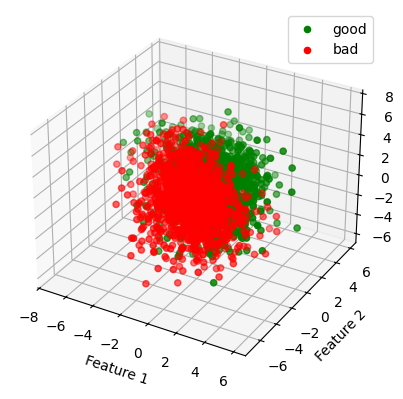

In [9]:

# Ahora agregamos el código para el gráfico en 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Usamos las tres primeras características seleccionadas para el gráfico
dataset_x = X_train_lessdim[:, 0]
dataset_y = X_train_lessdim[:, 1]
dataset_z = X_train_lessdim[:, 2]


# Crear el gráfico en 3D y colorear según la clase
ax.scatter(dataset_x[y_train == 'good'], dataset_y[y_train == 'good'], dataset_z[y_train == 'good'],
           label="good", facecolor="green")
ax.scatter(dataset_x[y_train == 'bad'], dataset_y[y_train == 'bad'], dataset_z[y_train == 'bad'],
           label="bad", facecolor="red")

# Etiquetas y leyenda
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.legend()
plt.show()